In [1]:
from __future__ import print_function
import keras
from keras import backend as K
from keras.engine.topology import Layer
from keras import activations
from keras import utils
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Dataset
CIFAR 100 has 2 labels - coarse and fine labels. Coarse labels are 20 in count while fine labels are 100 in count.
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [2]:
batch_size = 128
num_classes = 100
nb_classes = 20
epochs = 50
from keras.datasets import cifar100
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = cifar100.load_data('coarse')
(Xf_train, yf_train), (Xf_test, yf_test) = cifar100.load_data('fine')

# print shape of data while model is building
print("{1} train samples, {2} channel{0}, {3}x{4}".format("" if X_train.shape[1] == 1 else "s", *X_train.shape))
print("{1}  test samples, {2} channel{0}, {3}x{4}".format("" if X_test.shape[1] == 1 else "s", *X_test.shape))

# input image dimensions
_, img_channels, img_rows, img_cols = X_train.shape

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# convert class vectors to binary class matrices
Yf_train = np_utils.to_categorical(yf_train, num_classes)
Yf_test = np_utils.to_categorical(yf_test, num_classes)

50000 train samples, 32 channels, 32x3
10000  test samples, 32 channels, 32x3


In [3]:
np.shape(X_train)

(50000, 32, 32, 3)

In [3]:
print(max(y_train))
print(max(yf_train))

[19]
[99]


We first train models seperately for both the labels and then, merge their accuracy for comparision.

In [4]:
# A common Conv2D model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


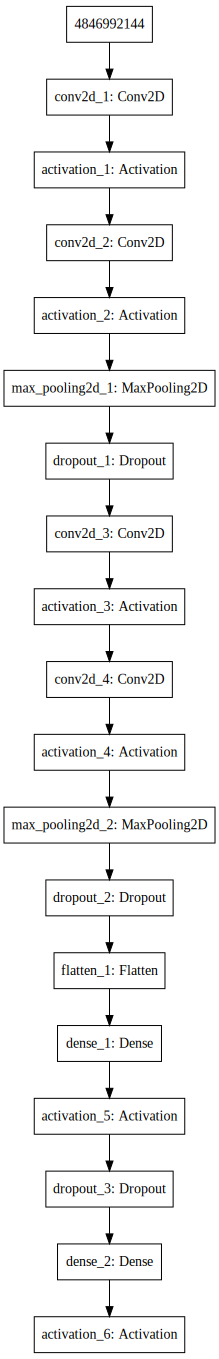

In [5]:
plot_model(model, to_file='model1.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=3e-4)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=epochs, verbose=1, validation_data=(X_test, Y_test))

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 184s 4ms/step - loss: 3.9049 - acc: 0.1234 - val_loss: 2.4794 - val_acc: 0.2420
Epoch 2/50
50000/50000 [==============================] - 190s 4ms/step - loss: 2.4510 - acc: 0.2466 - val_loss: 2.2227 - val_acc: 0.3215
Epoch 3/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2534 - acc: 0.3082 - val_loss: 2.1162 - val_acc: 0.3564
Epoch 4/50
50000/50000 [==============================] - 341s 7ms/step - loss: 2.1224 - acc: 0.3445 - val_loss: 1.9850 - val_acc: 0.3823
Epoch 5/50
50000/50000 [==============================] - 166s 3ms/step - loss: 2.0301 - acc: 0.3710 - val_loss: 1.9056 - val_acc: 0.4109
Epoch 6/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.9476 - acc: 0.3951 - val_loss: 1.8000 - val_acc: 0.4454
Epoch 7/50
50000/50000 [==============================] - 180s 4ms/step - loss: 1.8666 - acc: 0.4186 - val_loss: 1.7762 - 

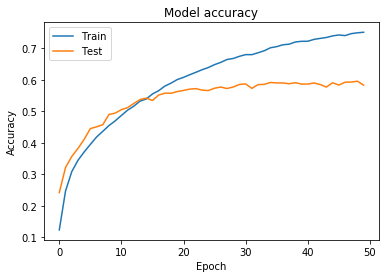

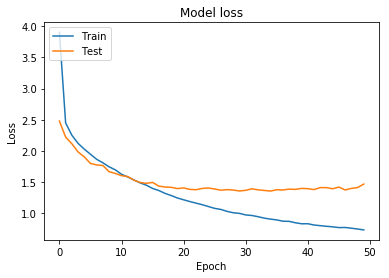

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('1.png')   # save the figure to file
plt.show()
plt.close()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('2.png')   # save the figure to file
plt.show()
plt.close()

In [9]:
scorec = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', scorec[0])
print('Test accuracy:', scorec[1])

Test score: 1.4693667346954347
Test accuracy: 0.5834


In [10]:
# A common Conv2D model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes)) #100 here
model.add(Activation('softmax'))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


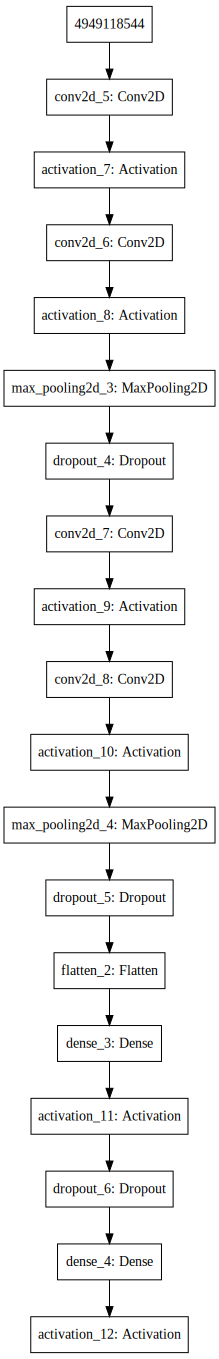

In [11]:
plot_model(model, to_file='model2.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [12]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=3e-4)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
history = model.fit(Xf_train, Yf_train, batch_size=batch_size, nb_epoch=epochs, verbose=1, validation_data=(Xf_test, Yf_test))

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 191s 4ms/step - loss: 15.9545 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 2/50
50000/50000 [==============================] - 176s 4ms/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/50
50000/50000 [==============================] - 186s 4ms/step - loss: 15.9519 - acc: 0.0103 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 4/50
50000/50000 [==============================] - 190s 4ms/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 5/50
50000/50000 [==============================] - 266s 5ms/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 6/50
50000/50000 [==============================] - 172s 3ms/step - loss: 15.9569 - acc: 0.0100 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 7/50
50000/50000 [==============================] - 182s 4ms/step - loss: 15.9569 - acc: 0.0100 - val_lo

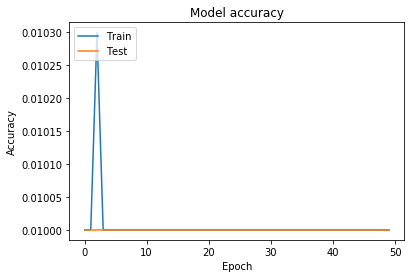

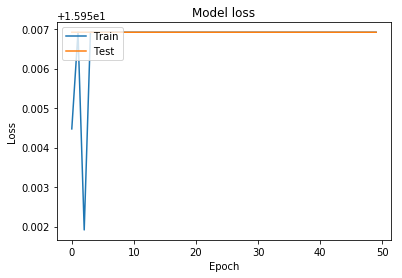

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('3.png')   # save the figure to file
plt.show()
plt.close()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('4.png')   # save the figure to file
plt.show()
plt.close()

In [15]:
scoref = model.evaluate(Xf_test, Yf_test, verbose=0)
print('Test score:', scoref[0])
print('Test accuracy:', scoref[1])

Test score: 15.95691436767578
Test accuracy: 0.01


In [16]:
print('Test score:', (scorec[0] + scoref[0])/2.0)
print('Test accuracy:', (scorec[1] + scoref[1])/2.0)

Test score: 8.713140551185608
Test accuracy: 0.2967


The average accuracy is 28.41% for corase and fine label based seperate neural net model. 
In next step, we create a single multi-output neural net, which will give better average accuracy.

## Multiobjective as Multioutput without branching

In [36]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

In [37]:
print(nb_classes)

20


In [38]:
main_input = Input(shape=(img_channels, img_rows, img_cols), name='main_input')
x = Conv2D(32, (3, 3), activation='relu', padding='same')(main_input)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
z = Dense(num_classes, activation = 'softmax')(x)
y = Dense(nb_classes, activation = 'softmax')(z)
modelmult = Model(inputs=[main_input], outputs=[y,z])

print(modelmult.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 64)        36928     
__________

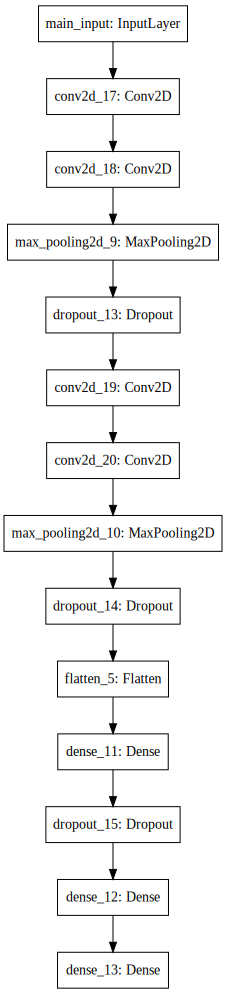

In [39]:
plot_model(modelmult, to_file='model3.png')
SVG(model_to_dot(modelmult).create(prog='dot', format='svg'))

In [41]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=3e-4)

modelmult.compile(optimizer=opt, loss='categorical_crossentropy',
              loss_weights=[1.,1.])

In [43]:
history = modelmult.fit(X_train, [Y_train, Yf_train], batch_size=batch_size, nb_epoch=epochs, verbose=1, validation_data=(X_test, [Y_test,Yf_test]))

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 168s 3ms/step - loss: 18.9528 - dense_13_loss: 2.9958 - dense_12_loss: 15.9569 - val_loss: 18.9527 - val_dense_13_loss: 2.9957 - val_dense_12_loss: 15.9569
Epoch 2/50
50000/50000 [==============================] - 192s 4ms/step - loss: 18.9528 - dense_13_loss: 2.9958 - dense_12_loss: 15.9569 - val_loss: 18.9527 - val_dense_13_loss: 2.9957 - val_dense_12_loss: 15.9569
Epoch 3/50
50000/50000 [==============================] - 186s 4ms/step - loss: 18.9528 - dense_13_loss: 2.9958 - dense_12_loss: 15.9569 - val_loss: 18.9527 - val_dense_13_loss: 2.9957 - val_dense_12_loss: 15.9569
Epoch 4/50
50000/50000 [==============================] - 190s 4ms/step - loss: 18.9528 - dense_13_loss: 2.9958 - dense_12_loss: 15.9569 - val_loss: 18.9527 - val_dense_13_loss: 2.9957 - val_dense_12_loss: 15.9569
Epoch 5/50
50000/50000 [==============================] - 200s 4ms/step - loss: 18.9528 - dens

KeyboardInterrupt: 

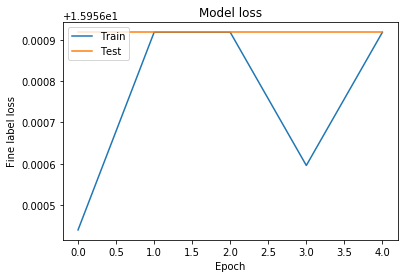

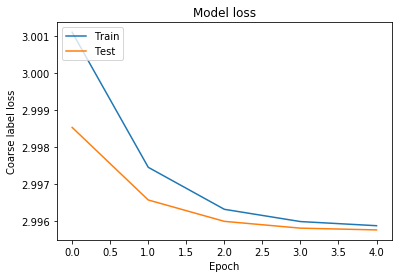

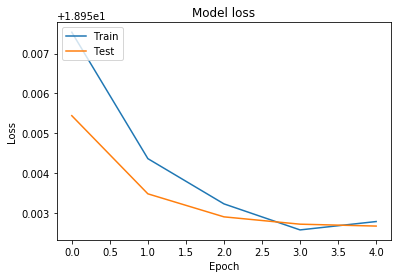

In [46]:
# Plot training & validation accuracy values
fig = plt.plot(history.history['dense_12_loss'])
plt.plot(history.history['val_dense_12_loss'])
plt.title('Model loss')
plt.ylabel('Fine label loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('11.png')   # save the figure to file
plt.show()
plt.close()

plt.plot(history.history['dense_13_loss'])
plt.plot(history.history['val_dense_13_loss'])
plt.title('Model loss')
plt.ylabel('Coarse label loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('12.png')   # save the figure to file
plt.show()
plt.close()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('13.png')   # save the figure to file
plt.show()
plt.close()

In [47]:
scoremult = modelmult.evaluate(X_test, [Y_test, Yf_test])
print('Test score:', scoremult[0])

10000/10000 [==============================] - 11s 1ms/step
Test score: 18.952663104248046


In [48]:
l = modelmult.predict(X_test)

In [49]:
l_cp = np.argmax(l[0], axis=1)
l_fp = np.argmax(l[1], axis=1)

In [50]:
print(l_cp)
print(l_fp)

[6 6 6 ... 6 6 6]
[57 57 57 ... 57 57 57]


In [51]:
y_testa = y_test.flatten()
yf_testa = yf_test.flatten()
scoremultc = 0
scoremultf = 0
for i in range(10000):
    if y_testa[i]== l_cp[i]:
        scoremultc+=1
    if yf_testa[i]== l_fp[i]:
        scoremultf+=1
scoremultc = scoremultc/10000.0
scoremultf = scoremultf/10000.0

In [52]:
print('Coarse accuracy:', scoremultc)
print('Fine accuracy:', scoremultf)
print('Test accuracy:', (scoremultf + scoremultc)/2.0)

Coarse accuracy: 0.05
Fine accuracy: 0.01
Test accuracy: 0.03


As we can see, the outputs get stagnant at fixed value of 6 for coarse and 57 for fine because we used single neural net without branching.

# Multiobjective as Multioutput with branching

In [53]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

In [54]:
main_input = Input(shape=(img_channels, img_rows, img_cols), name='main_input')
x = Conv2D(32, (3, 3), activation='relu', padding='same')(main_input)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
y = Dense(nb_classes, activation = 'softmax')(x)
z = Dense(num_classes, activation = 'softmax')(x)
modelmult = Model(inputs=[main_input], outputs=[y,z])

print(modelmult.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 32, 32, 32)   896         main_input[0][0]                 
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 30, 30, 32)   9248        conv2d_21[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 15, 15, 32)   0           conv2d_22[0][0]                  
__________________________________________________________________________________________________
dropout_16

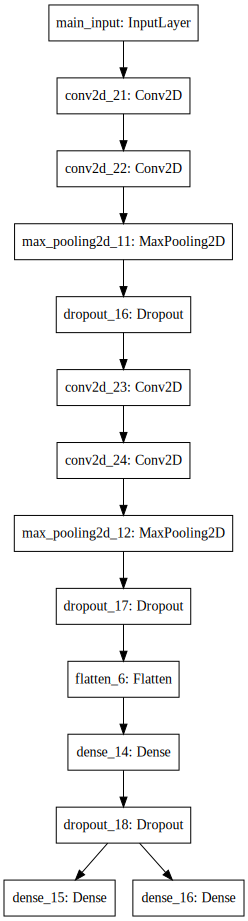

In [55]:
plot_model(modelmult, to_file='model4.png')
SVG(model_to_dot(modelmult).create(prog='dot', format='svg'))

In [56]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=3e-4)

modelmult.compile(optimizer=opt, loss='categorical_crossentropy',
              loss_weights=[1.,1.])

In [57]:
history = modelmult.fit(X_train, [Y_train, Yf_train], batch_size=batch_size, nb_epoch=epochs, verbose=1, validation_data=(X_test, [Y_test,Yf_test]))

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 201s 4ms/step - loss: 8.9262 - dense_15_loss: 3.6565 - dense_16_loss: 5.2698 - val_loss: 6.7623 - val_dense_15_loss: 2.5805 - val_dense_16_loss: 4.1819
Epoch 2/50
50000/50000 [==============================] - 215s 4ms/step - loss: 6.5372 - dense_15_loss: 2.5179 - dense_16_loss: 4.0193 - val_loss: 6.1488 - val_dense_15_loss: 2.3528 - val_dense_16_loss: 3.7961
Epoch 3/50
50000/50000 [==============================] - 198s 4ms/step - loss: 6.0552 - dense_15_loss: 2.3423 - dense_16_loss: 3.7129 - val_loss: 5.6520 - val_dense_15_loss: 2.1736 - val_dense_16_loss: 3.4784
Epoch 4/50
50000/50000 [==============================] - 234s 5ms/step - loss: 5.7040 - dense_15_loss: 2.2127 - dense_16_loss: 3.4913 - val_loss: 5.3410 - val_dense_15_loss: 2.0545 - val_dense_16_loss: 3.2865
Epoch 5/50
50000/50000 [==============================] - 211s 4ms/step - loss: 5.4291 - dense_15_loss: 2.1112

Epoch 40/50
50000/50000 [==============================] - 219s 4ms/step - loss: 2.4890 - dense_15_loss: 0.9692 - dense_16_loss: 1.5197 - val_loss: 3.4581 - val_dense_15_loss: 1.3402 - val_dense_16_loss: 2.1179
Epoch 41/50
50000/50000 [==============================] - 221s 4ms/step - loss: 2.4648 - dense_15_loss: 0.9592 - dense_16_loss: 1.5055 - val_loss: 3.4624 - val_dense_15_loss: 1.3430 - val_dense_16_loss: 2.1194
Epoch 42/50
50000/50000 [==============================] - 219s 4ms/step - loss: 2.4311 - dense_15_loss: 0.9426 - dense_16_loss: 1.4885 - val_loss: 3.4846 - val_dense_15_loss: 1.3558 - val_dense_16_loss: 2.1288
Epoch 43/50
50000/50000 [==============================] - 218s 4ms/step - loss: 2.4031 - dense_15_loss: 0.9354 - dense_16_loss: 1.4676 - val_loss: 3.4961 - val_dense_15_loss: 1.3553 - val_dense_16_loss: 2.1408
Epoch 44/50
50000/50000 [==============================] - 218s 4ms/step - loss: 2.3797 - dense_15_loss: 0.9242 - dense_16_loss: 1.4555 - val_loss: 3.4756 -

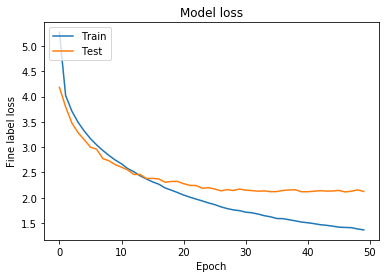

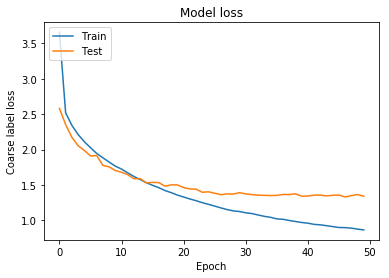

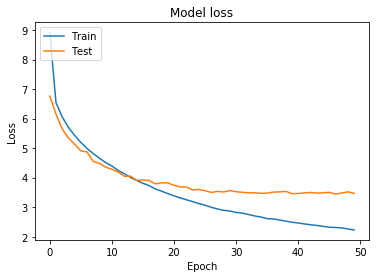

In [58]:
# Plot training & validation accuracy values
fig = plt.plot(history.history['dense_16_loss'])
plt.plot(history.history['val_dense_16_loss'])
plt.title('Model loss')
plt.ylabel('Fine label loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('21.png')   # save the figure to file
plt.show()
plt.close()

plt.plot(history.history['dense_15_loss'])
plt.plot(history.history['val_dense_15_loss'])
plt.title('Model loss')
plt.ylabel('Coarse label loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('22.png')   # save the figure to file
plt.show()
plt.close()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('23.png')   # save the figure to file
plt.show()
plt.close()

In [59]:
scoremult = modelmult.evaluate(X_test, [Y_test, Yf_test])
print('Test score:', scoremult[0])

10000/10000 [==============================] - 12s 1ms/step
Test score: 3.464756929397583


In [60]:
scoremult

[3.464756929397583, 1.339818218421936, 2.1249387088775635]

In [61]:
l = modelmult.predict(X_test)

In [62]:
l_cp = np.argmax(l[0], axis=1)
l_fp = np.argmax(l[1], axis=1)

In [63]:
y_testa = y_test.flatten()
yf_testa = yf_test.flatten()
scoremultc = 0
scoremultf = 0
for i in range(10000):
    if y_testa[i]== l_cp[i]:
        scoremultc+=1
    if yf_testa[i]== l_fp[i]:
        scoremultf+=1
scoremultc = scoremultc/10000.0
scoremultf = scoremultf/10000.0

In [64]:
print('Coarse accuracy:', scoremultc)
print('Fine accuracy:', scoremultf)
print('Test accuracy:', (scoremultf + scoremultc)/2.0)

Coarse accuracy: 0.592
Fine accuracy: 0.4613
Test accuracy: 0.52665


The average accuracy is 52.66% for coarse and fine label based single multi-output neural net model, which is more than single output models by more than 20%.